In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter

%matplotlib inline

pd.set_option('display.max_rows', None)

In [2]:
ref_df = pd.read_csv("../data/UNdata_refugees.csv", skipfooter=3, engine='python')

In [3]:
ref_df["Year"].min()

1975

In [4]:
ref_df = ref_df[["Country or territory of asylum or residence", "Country or territory of origin", 
                      "Year", "Refugees<sup>*</sup>"]]
ref_df = ref_df.rename({"Country or territory of asylum or residence": "asylum", 
                        "Country or territory of origin": "origin", "Refugees<sup>*</sup>": "refugees"}, axis="columns")
ref_df["Year"] = ref_df["Year"].astype(int)
ref_df = ref_df.dropna() # There are 198 rows with refugees as NA
ref_df["refugees"] = ref_df["refugees"].astype(int)

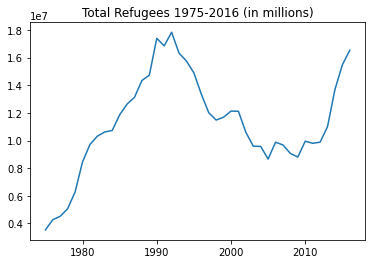

In [5]:
plt.plot(ref_df.groupby("Year").sum())
plt.title("Total Refugees 1975-2016 (in millions)")
print()

In [6]:
ref_df[ref_df["Year"] == 2016][["origin", "refugees"]].groupby("origin").sum().sort_values("refugees", ascending=False)\
                            .head(20).style.format('{:,}')
# Country refugee totals for 2016

,refugees
origin,
Syrian Arab Rep.,"5,500,448"
Afghanistan,"2,488,689"
South Sudan,"1,436,651"
Somalia,"1,012,323"
Sudan,"646,036"
Dem. Rep. of the Congo,"537,265"
Central African Rep.,"490,892"
Eritrea,"431,704"
Burundi,"408,085"


In [7]:
ref_df[ref_df["Year"] == 1992].groupby("origin").sum().sort_values("refugees", ascending=False).head(20)[["refugees"]]

,refugees
origin,
Afghanistan,4552153
Various,3118510
Mozambique,1445474
Iraq,1343824
Somalia,812195
Liberia,520915
Viet Nam,517111
Eritrea,503200
Bosnia and Herzegovina,437501


In [8]:
ref_df.sort_values("refugees",
                   ascending=False).groupby("origin").sum().sort_values("refugees", ascending=False).head(20)[["refugees"]]

,refugees
origin,
Afghanistan,125836802
Various,53954607
Iraq,26456503
Ethiopia,23286613
Somalia,19003975
Syrian Arab Rep.,17662833
Sudan,15058675
Viet Nam,14839294
Angola,13013851


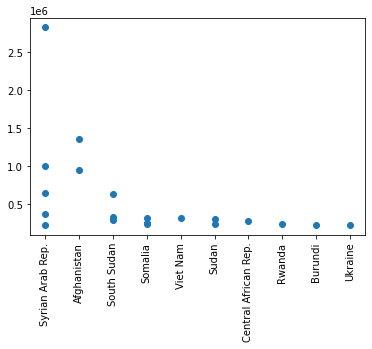

In [9]:
# Need to sum origin, multiple asylum countries reason for multiple values
plt.scatter(ref_df[ref_df["Year"] == 2016].sort_values("refugees", ascending=False).head(20)["origin"],
            ref_df[ref_df["Year"] == 2016].sort_values("refugees", ascending=False).head(20)["refugees"])
plt.xticks(rotation=90)
print()

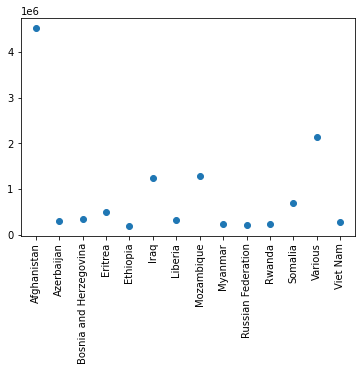

In [10]:
plt.scatter(ref_df[ref_df["Year"] == 1992].sort_values("refugees", ascending=False).head(20).groupby("origin").sum().index,
            ref_df[ref_df["Year"] == 1992].sort_values("refugees", ascending=False).head(20).groupby("origin").sum().iloc[:,1])
plt.xticks(rotation=90)
print()

In [11]:
ref_df[ref_df["Year"] == 1992].sort_values("refugees", ascending=False).head(20).groupby("origin").sum().index

Index(['Afghanistan', 'Azerbaijan', 'Bosnia and Herzegovina', 'Eritrea',
       'Ethiopia', 'Iraq', 'Liberia', 'Mozambique', 'Myanmar',
       'Russian Federation', 'Rwanda', 'Somalia', 'Various', 'Viet Nam'],
      dtype='object', name='origin')

In [12]:
ref_df[ref_df["Year"] == 1992].sort_values("refugees", ascending=False).groupby("origin").sum().head(20).iloc[:,1]

origin
Afghanistan                         4552153
Albania                                4353
Algeria                                  71
Angola                               300492
Argentina                               113
Armenia                              195003
Azerbaijan                           300000
Bahrain                                  53
Bangladesh                            53921
Benin                                     4
Bhutan                                75442
Bolivia (Plurinational State of)         28
Bosnia and Herzegovina               437501
Botswana                                  3
Brazil                                   11
Bulgaria                               2981
Burkina Faso                             61
Burundi                              184135
Cabo Verde                                1
Cambodia                              28851
Name: refugees, dtype: int32

In [13]:
tmp_df = ref_df[ref_df["Year"] == 2016].groupby("origin").sum().sort_values("refugees", ascending=False).head(20).reset_index()

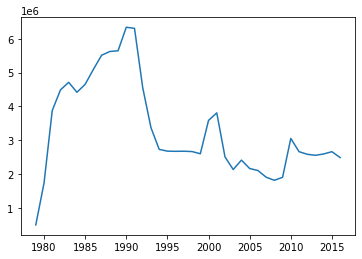

In [14]:
plt.plot(ref_df[ref_df["origin"] == "Afghanistan"].groupby("Year").sum()["refugees"])

In [15]:
ref_df[ref_df["origin"] == "Afghanistan"].groupby("Year").sum()

,refugees
Year,
1979,500000
1980,1734921
1981,3879984
1982,4488214
1983,4712735
1984,4417651
1985,4653193
1986,5094283
1987,5511740


In [16]:
org_df = ref_df[["origin", "Year", "refugees"]]

In [17]:
origin_lst = org_df.groupby("origin").sum().sort_values("refugees", ascending = False).index.tolist()
del origin_lst[1] # remove 'Various'
origin_lst

['Afghanistan',
 'Iraq',
 'Ethiopia',
 'Somalia',
 'Syrian Arab Rep.',
 'Sudan',
 'Viet Nam',
 'Angola',
 'Rwanda',
 'Burundi',
 'Dem. Rep. of the Congo',
 'Mozambique',
 'Liberia',
 'Bosnia and Herzegovina',
 'Eritrea',
 'Western Sahara',
 'Myanmar',
 'State of Palestine',
 'Croatia',
 'Azerbaijan',
 'Sierra Leone',
 'China',
 'Serbia (and Kosovo: S/RES/1244 (1999))',
 'Russian Federation',
 'Sri Lanka',
 'Chad',
 'South Sudan',
 'Islamic Rep. of Iran',
 'Uganda',
 'Central African Rep.',
 'Turkey',
 "Lao People's Dem. Rep.",
 'El Salvador',
 'Bhutan',
 'Cambodia',
 'Armenia',
 'Ukraine',
 'Philippines',
 'Mauritania',
 'Mali',
 'Colombia',
 'Pakistan',
 'Nicaragua',
 'Guatemala',
 'Guinea',
 'Tajikistan',
 'Togo',
 'Namibia',
 'Stateless',
 "Côte d'Ivoire",
 'Zimbabwe',
 'Tibetans',
 'Nigeria',
 'Haiti',
 'Equatorial Guinea',
 'Senegal',
 'Bangladesh',
 'Cuba',
 'Yemen',
 'Lebanon',
 'Indonesia',
 'Ghana',
 'Congo',
 'Timor-Leste',
 'Romania',
 'Uzbekistan',
 'South Africa',
 'Georgi

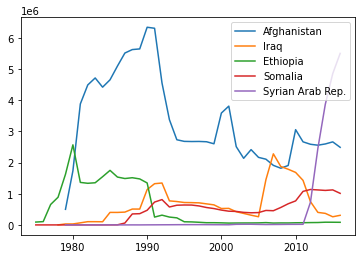

In [18]:
for x in origin_lst[:5]:
    plt.plot(ref_df[ref_df["origin"] == x].groupby("Year").sum()["refugees"],
             label=x)
plt.gca().legend()

In [19]:
for x in range(1975,2017):
    print(len(set(ref_df[ref_df["Year"] == x]["asylum"])), len(set(ref_df[ref_df["Year"] == x]["origin"])))

50 39
53 34
72 33
82 45
88 42
90 64
92 65
94 69
97 70
96 72
99 75
97 75
98 75
98 92
101 99
112 111
118 122
132 134
139 144
142 172
143 178
143 184
147 186
146 186
151 189
150 189
151 182
147 191
147 191
148 191
149 190
153 195
155 196
156 195
161 193
163 196
169 199
167 200
169 203
170 205
172 203
173 204


In [20]:
tmp_df = ref_df[ref_df["Year"] == 2016][["origin", "refugees"]].groupby("origin").sum()\
    .sort_values( "refugees", ascending = False)
tmp_df[tmp_df["refugees"] > 100]

,refugees
origin,
Syrian Arab Rep.,5500448
Afghanistan,2488689
South Sudan,1436651
Somalia,1012323
Sudan,646036
Dem. Rep. of the Congo,537265
Central African Rep.,490892
Eritrea,431704
Burundi,408085


In [21]:
tmp_df = ref_df[ref_df["Year"] == 1975][["origin", "refugees"]].groupby("origin").sum()\
    .sort_values( "refugees", ascending = False)
tmp_df[tmp_df["refugees"] > 100]

,refugees
origin,
Various,1920594
Angola,501830
Guinea,300000
Rwanda,175720
Burundi,141940
Ethiopia,91410
Equatorial Guinea,90000
Lao People's Dem. Rep.,55510
Guinea-Bissau,46000


In [22]:
ref_df[ref_df["origin"] ==  "Holy See (the)"]

,asylum,origin,Year,refugees
58446,Germany,Holy See (the),2004,2


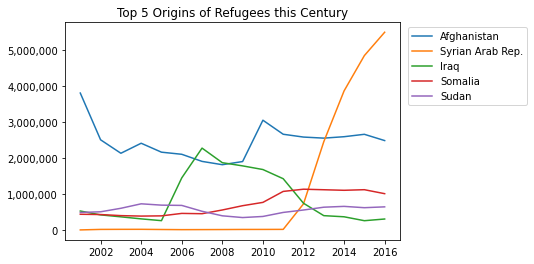

In [23]:
this_cent_df = ref_df[ref_df["Year"] > 2000]
origin_lst = this_cent_df.groupby("origin").sum().sort_values("refugees", ascending = False).index.tolist()
for x in origin_lst[:5]:
    plt.plot(this_cent_df[this_cent_df["origin"] == x].groupby("Year").sum()["refugees"],
             label=x)
#plt.gca().legend()
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', ncol=1)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.title("Top 5 Origins of Refugees this Century")
print()

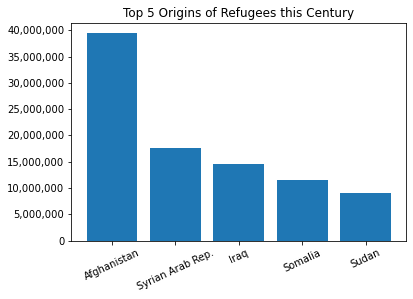

In [36]:
plt.bar(origin_lst[:5], this_cent_df.groupby("origin").sum()\
        .sort_values("refugees", ascending = False)["refugees"][:5].tolist())
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=25)
plt.title("Top 5 Origins of Refugees this Century")
print()

In [37]:
import statsmodels.api as sm
import statsmodels.formula.api as smf